\1. Crei un dataframe Pandas contenente le informazioni presenti nella collection

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
url = 'https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv'
df = pd.read_csv(url)
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


2. Elimini tutte le colonne ad esclusione di ‘borough’, ‘cuisine’ e ‘name’

In [ ]:
df = df.drop(columns=['N','address','grades','restaurant_id'])
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


3. Conti il numero di ristoranti che hanno ‘Missing’ come quartiere

In [ ]:
df[df['borough'] == 'Missing'].count()

borough    51
cuisine    51
name       51
dtype: int64

4. Sostituisca alla parola ‘Missin’g il valore null

In [ ]:
df = df.replace('Missing',np.NaN)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


Elimini dal dataframe tutti i ristoranti di cui non si conosce il quartiere

In [ ]:
df =df.drop(df[(df['borough'].isnull())].index)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


Calcoli il numero di ristoranti per ogni cucina. Ordinare in ordine decrescente a partire dal tipo di cucina che ha più ristoranti

In [ ]:
df.groupby('cuisine')['name'].count().sort_values(ascending=False)

cuisine
American           6173
Chinese            2412
Café/Coffee/Tea    1210
Pizza              1162
Italian            1069
                   ... 
Iranian               2
Chilean               1
Californian           1
Polynesian            1
Creole/Cajun          1
Name: name, Length: 85, dtype: int64

Visualizzi il tipo di cucina con più ristoranti

In [ ]:
df.groupby('cuisine')['name'].count().sort_values(ascending=False).head(1)

cuisine
American    6173
Name: name, dtype: int64

8. Visualizzi un grafico a barre con i primi 10 tipi di cucina


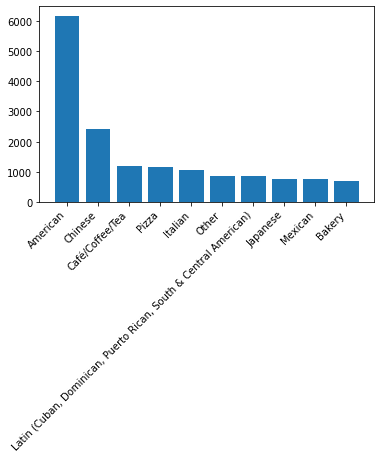

In [ ]:
df1 = df.groupby('cuisine', as_index=False)['name'].count().sort_values('name',ascending=False).head(10)
fig = plt.figure()
ax = plt.axes()
ax.bar(df1['cuisine'],df1['name'].values)
fig.autofmt_xdate(rotation=45)
plt.show()

Calcoli il numero di ristoranti per ogni quartiere

In [ ]:
df.groupby('borough')['name'].count()

borough
Bronx             2322
Brooklyn          6046
Manhattan        10211
Queens            5615
Staten Island      963
Name: name, dtype: int64

Visualizzi i dati precedenti in un grafico a torta

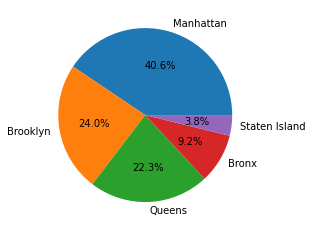

In [ ]:
df2 = df.groupby('borough', as_index=False)['name'].count().sort_values('name',ascending=False)
fig = plt.figure()
ax = plt.axes()
ax.pie(df2['name'].values, labels=df2['borough'],autopct='%1.1f%%')
plt.show()

Visualizzi i due grafici affiancati. Dare titoli appropriati ad entrambi i grafici

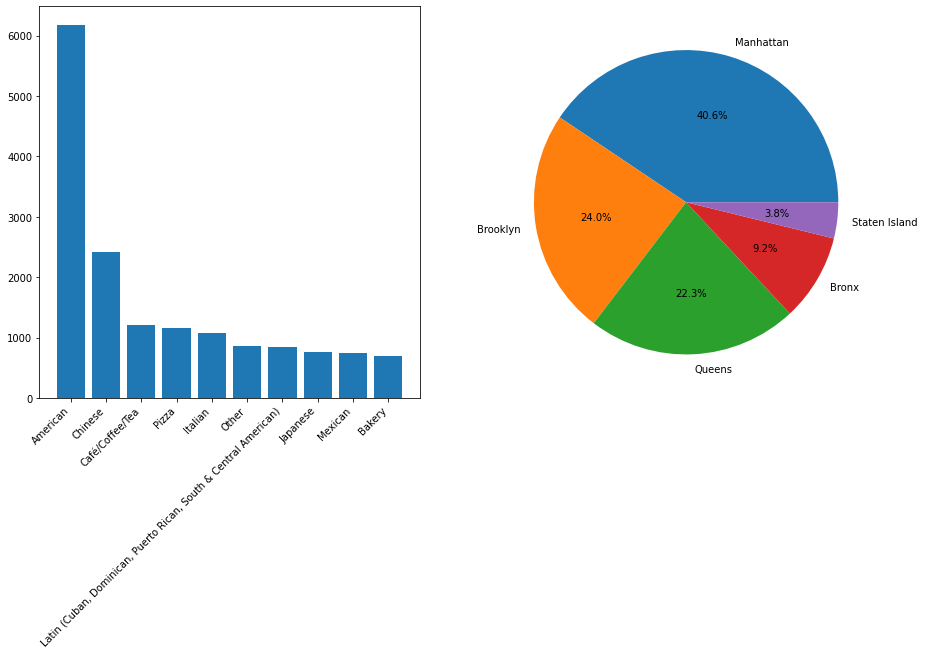

In [ ]:
fig, (ax1,ax2)= plt.subplots(1,2)

fig.set_size_inches(15,8)
ax1.bar(df1['cuisine'].head(10),df1['name'].head(10))
fig.autofmt_xdate(rotation=45)
ax2.pie(df2['name'], labels=df2['borough'],autopct='%1.1f%%')

plt.show()

Crei un nuovo dataframe sostituendo la parola 'non American' a tutti i tipi di cucina che non sono americani

In [ ]:
df3 = df
df3['cuisine'][df3['cuisine'] != 'American'] = 'Non American'
df3

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Non American,Camden Food Express
25355,Manhattan,Non American,Wooly'S Nyc
25356,Manhattan,Non American,Rafi 786
25357,Brooklyn,Non American,NaN


Visualizzi, per ogni quartiere, il numero di ristoranti di cucina americana e non americana. Il risultato deve essere il seguente:

In [ ]:
df3 = df.groupby(['borough','cuisine'])['name'].count()
df3

borough        cuisine     
Bronx          American         411
               Non American    1911
Brooklyn       American        1273
               Non American    4773
Manhattan      American        3205
               Non American    7006
Queens         American        1040
               Non American    4575
Staten Island  American         244
               Non American     719
Name: name, dtype: int64

Crei un nuovo dataframe che abbia una colonna che contiene i ristoranti di cucina americana e una colonna che contiene il numero di ristoranti che propongono cucine non americane. Il risultato deve essere il seguente:

In [ ]:
df4 = df3.unstack()
df4

cuisine,American,Non American
borough,,
Bronx,411,1911
Brooklyn,1273,4773
Manhattan,3205,7006
Queens,1040,4575
Staten Island,244,719


Resetti l'indice in modo da avere le tre colonne necessarie per costruire un grafico a barre. Il risultato deve essere il seguente:

In [ ]:
df5 = df4.reset_index()
df5

cuisine,borough,American,Non American
0,Bronx,411,1911
1,Brooklyn,1273,4773
2,Manhattan,3205,7006
3,Queens,1040,4575
4,Staten Island,244,719


Visualizzi un istogramma in cui per ogni quartiere si visualizzi una barra con il numero dei ristoranti americani ed una per quelli non americani. Il risultato deve essere il seguente:

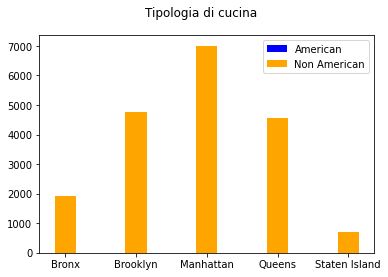

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.bar(df5['borough'], df5['American'], label='American', color='blue', width=.3)
ax.bar(df5['borough'], df5['Non American'], label='Non American', color='orange',width=.3)
ax.legend(loc=1)    

fig.suptitle('Tipologia di cucina')

plt.show()